In [605]:
# Import Basic Libraries
import os
import sys
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import pickle
import math
import joblib
import datetime
from datetime import datetime

# Import Neural Network Libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout,Bidirectional
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [606]:
# Create function to calculate root mean square error
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [607]:
# Read csv file
df=pd.read_csv('/home/tarunpreet/Desktop/jacob/Memory_Utilization.csv')
df['Date']=pd.to_datetime(df['Date'] + ' ' + df['Time'])

Text(0.5, 1.0, 'Memory Utilization')

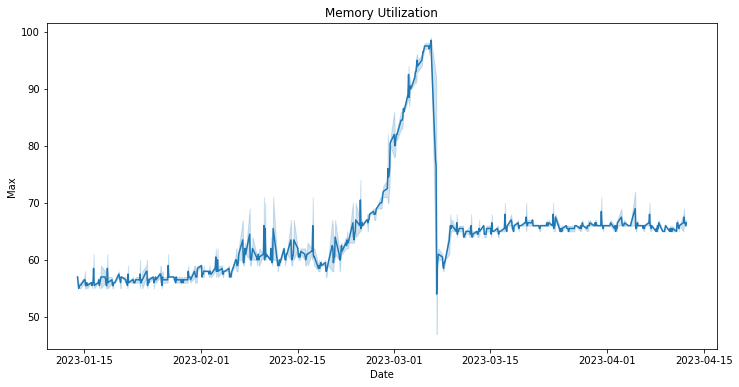

In [608]:
newdf = df.drop(labels=['Time'],axis=1)
plt.figure(figsize=(12, 6))
sns.lineplot(x="Date", y="Max", data=newdf)
plt.title('Memory Utilization')

In [609]:
# Split data into window
# split the data based on the index dates
newdf = newdf.set_index(newdf['Date'])
newdf = newdf.sort_index()
train = newdf.loc['2023-01-14 01:00:00':'2023-03-25 11:00:00']
val=newdf.loc['2023-03-26 01:00:00':'2023-04-07 11:00:00']
test  = newdf['2023-04-08 01:00:00':'2023-04-12 11:00:00']

In [610]:
# Drop unnecessary columns in dataset
Train=train.drop(labels=['Date'],axis=1)
Val=val.drop(labels=['Date'],axis=1)
Test=test.drop(labels=['Date'],axis=1)
Train

,Max
Date,
2023-01-14 01:00:00,57
2023-01-14 01:00:00,57
2023-01-14 03:00:00,56
2023-01-14 03:00:00,56
2023-01-14 05:00:00,55
...,...
2023-03-25 07:00:00,65
2023-03-25 09:00:00,65
2023-03-25 09:00:00,65


In [611]:
Xtrainscaler = MinMaxScaler()
Xtrainscaler.fit(Train)
SXtrain= Xtrainscaler.transform(Train)

Xvalscaler = MinMaxScaler()
Xvalscaler.fit(Val)
SXval= Xvalscaler.transform(Val)


In [612]:
window_size=60
predictions=24
x=[]
y=[]
for i in range(0, len(Train)-84, predictions):
    x.append(SXtrain[i:window_size+i])
    y.append(SXtrain[i+window_size:i+window_size+predictions])

X_train=np.array(x)
Y_train=np.array(y)

In [613]:
window_size=60
predictions=24
x1=[]
y1=[]
for i in range(0, len(Val)-60, predictions):
    x1.append(SXval[i:window_size+i])
    y1.append(SXval[i+window_size:i+window_size+predictions])

X_val=np.array(x1)
Y_val=np.array(y1)
Y_val.shape

(4, 24, 1)

In [614]:
#Reshape train and test set for LSTM Model

trainX = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2])
valX = X_val.reshape(X_val.shape[0],X_val.shape[1],X_val.shape[2])

In [615]:
# Define Long Short Term Memory (LSTM Model)
print('model used in LSTM')
lstm = Sequential()
lstm.add(LSTM(input_shape = (60,1),units= 60,  activation='relu',return_sequences = True))
lstm.add(LSTM(60))
lstm.add(Dense(72, activation='relu'))
lstm.add(Dense(48, activation='relu'))
lstm.add(Dense(24))
lstm.summary()

model used in LSTM
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 60, 60)            14880     
                                                                 
 lstm_49 (LSTM)              (None, 60)                29040     
                                                                 
 dense_90 (Dense)            (None, 72)                4392      
                                                                 
 dense_91 (Dense)            (None, 48)                3504      
                                                                 
 dense_92 (Dense)            (None, 24)                1176      
                                                                 
Total params: 52,992
Trainable params: 52,992
Non-trainable params: 0
_________________________________________________________________


In [616]:
# Early stopping stop training once the model performance stops improving
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')

Epoch 1/100
3/3 [==============================] - 2s 178ms/step - loss: 0.1471 - mae: 0.3273 - val_loss: 0.1231 - val_mae: 0.3498
Epoch 2/100
3/3 [==============================] - 0s 29ms/step - loss: 0.1371 - mae: 0.3124 - val_loss: 0.1103 - val_mae: 0.3293
Epoch 3/100
3/3 [==============================] - 0s 28ms/step - loss: 0.1210 - mae: 0.2885 - val_loss: 0.0914 - val_mae: 0.2931
Epoch 4/100
3/3 [==============================] - 0s 28ms/step - loss: 0.1021 - mae: 0.2475 - val_loss: 0.0651 - val_mae: 0.2175
Epoch 5/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0843 - mae: 0.2081 - val_loss: 0.0561 - val_mae: 0.1872
Epoch 6/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0708 - mae: 0.1919 - val_loss: 0.0406 - val_mae: 0.1629
Epoch 7/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0565 - mae: 0.1666 - val_loss: 0.0323 - val_mae: 0.1456
Epoch 8/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0476 - mae: 0.1

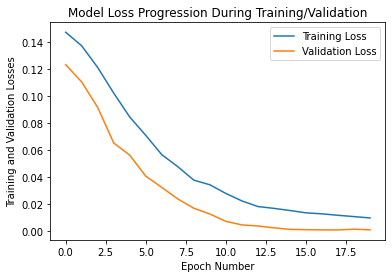

In [617]:
# Compile the model
lstm.compile(loss='mse', optimizer='adam',metrics=['mae'])
history_lstm = lstm.fit(trainX, Y_train, epochs = 100, verbose=1,validation_split=0.1,batch_size=10, callbacks=[early_stopping])
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [618]:
# Test the model
ytrain_pred=lstm.predict(trainX)
yval_pred = lstm.predict(valX)

1/1 [==============================] - 0s 270ms/step


In [619]:
Ytrain= Y_train.reshape(Y_train.shape[0], (Y_train.shape[1]*Y_train.shape[2]))
Yval= Y_val.reshape(Y_val.shape[0], (Y_val.shape[1]*Y_val.shape[2]))

In [620]:
# Tranform the scale data
trainPredict = Xtrainscaler.inverse_transform(ytrain_pred)
valPredict = np.round(Xvalscaler.inverse_transform(yval_pred))
Y_Val = Xvalscaler.inverse_transform(Yval)
Y_Train=Xtrainscaler.inverse_transform(Ytrain)
Predict_values=valPredict.flatten()
Actual_values=Y_Val.flatten()
print("Predicted values",Predict_values)
print("Actual values",Actual_values)

Predicted values [66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66.
 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66.
 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66.
 66. 66. 66. 67. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66.
 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66.
 66. 66. 66. 66. 66. 66.]
Actual values [66. 66. 71. 66. 66. 66. 66. 66. 66. 65. 66. 66. 66. 66. 66. 66. 66. 66.
 66. 66. 66. 66. 67. 66. 65. 66. 66. 66. 65. 65. 66. 66. 66. 65. 66. 67.
 66. 69. 67. 66. 66. 66. 66. 66. 66. 66. 66. 67. 66. 66. 66. 66. 66. 66.
 66. 66. 66. 66. 67. 66. 66. 72. 66. 65. 65. 66. 66. 66. 66. 67. 66. 66.
 66. 66. 66. 66. 65. 66. 66. 66. 66. 65. 66. 66. 67. 66. 70. 66. 65. 67.
 66. 66. 65. 66. 66. 66.]


In [621]:
# Compare train and test score to avoid overfitting
train_score = math.sqrt(mean_squared_error(Y_Train, trainPredict))
print('Train Score',train_score)
test_score = math.sqrt(mean_squared_error(Y_Val, valPredict))
print('Test Score', test_score)

Train Score 4.685827456099126
Test Score 1.050793351076541


In [622]:
# Evaluate the model using Regression Metrics
mse = mean_squared_error(Y_Val, valPredict)
mae = mean_absolute_error(Y_Val, valPredict)
mape = mean_absolute_percentage_error(Y_Val, valPredict)
rms_error = rmse(Y_Val, valPredict)
R2_score=metrics.r2_score(Y_Val, valPredict)
print('mean square error',mse)
print('mean absolute error',mae)
print('mean abs_percentage_error',mape)
print('root_mean square error',rms_error)
print('R2_score:', R2_score)


mean square error 1.1041666666666667
mean absolute error 0.3958333333333333
mean abs_percentage_error 0.005814190166811818
root_mean square error 1.050793351076541
R2_score: -0.1972046041813483


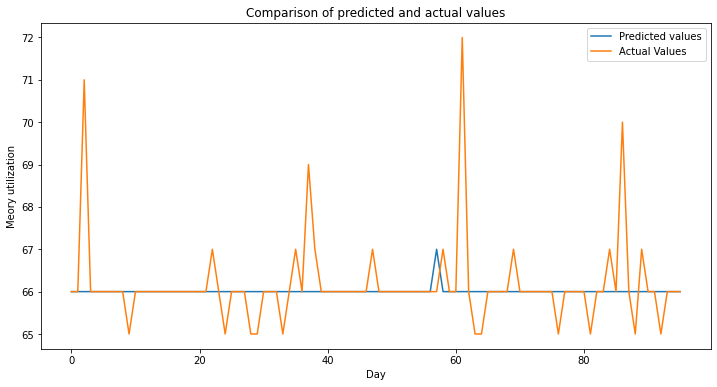

In [623]:
plt.figure(figsize=(12, 6))
plt.plot(Predict_values)
plt.plot(Actual_values)
plt.title('Comparison of predicted and actual values')
plt.ylabel('Meory utilization')
plt.xlabel('Day')
plt.legend(['Predicted values', 'Actual Values'])
plt.show()

In [565]:
Forecast=Test['Max'].to_numpy()
Forecast= Forecast.reshape(1, Forecast.shape[0],1)
Forecast.shape

(1, 60, 1)

In [566]:
ytest = lstm.predict(Forecast)

1/1 [==============================] - 0s 288ms/step


In [567]:
Ytest =np.round(Xvalscaler.inverse_transform(ytest))

In [568]:
Ytest=Ytest.flatten()
Forecast_values=np.concatenate((Predict_values,Ytest))

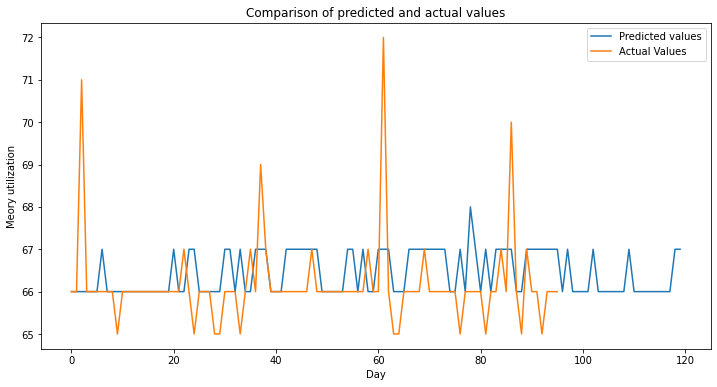

In [569]:
plt.figure(figsize=(12, 6))
plt.plot(Forecast_values)
plt.plot(Actual_values)
plt.title('Comparison of predicted and actual values')
plt.ylabel('Meory utilization')
plt.xlabel('Day')
plt.legend(['Predicted values', 'Actual Values'])
plt.show()